In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os,sys

In [2]:
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostClassifier

#from rgf.sklearn import RGFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
#from ggplot import *
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [4]:
import sklearn
sklearn.__version__

'0.20.1'

In [5]:
pwd()

'/mnt/data/scripts/notebooks/ashwin/test'

In [6]:
os.chdir('flight_predictor_data')
train_df = pd.read_csv('weather_data_train.csv')
test_df = pd.read_csv('weather_data_test.csv')

In [7]:
train_df.shape,test_df.shape

((2183, 1126), (100, 1126))

In [8]:
pred = pd.read_csv('flight_data_train.csv')

In [9]:
pred.head()

Day_Id  Spot1 maxDistance  Spot1 totalDistance  Spot1 totalFlights  \
0       1               0.00                 0.00                   0   
1       2              23.84                41.82                   2   
2       3               0.00                 0.00                   0   
3       4               0.00                 0.00                   0   
4       5              24.40                48.20                   2   

   Spot2 maxDistance  Spot2 totalDistance  Spot2 totalFlights  \
0                0.0                  0.0                   0   
1                0.0                  0.0                   0   
2                0.0                  0.0                   0   
3                0.0                  0.0                   0   
4                0.0                  0.0                   0   

   Spot3 maxDistance  Spot3 totalDistance  Spot3 totalFlights  \
0                0.0                  0.0                   0   
1                0.0                  0.0                   0   
2                0.0                  0.0                   0   
3                0.0                  0.0                   0   
4                0.0                  0.0                   0   

           ...           Spot285 totalFlights  Spot286 maxDistance  \
0          ...                              0                  0.0   
1          ...                              0                  0.0   
2          ...                              0                  0.0   
3          ...                              0                  0.0   
4          ...                              0                  0.0   

   Spot286 totalDistance  Spot286 totalFlights  Spot287 maxDistance  \
0                    0.0                     0                  0.0   
1                    0.0                     0                  0.0   
2                    0.0                     0                  0.0   
3                    0.0                     0                  0.0   
4                    0.0                     0                  0.0   

   Spot287 totalDistance  Spot287 totalFlights  Spot288 maxDistance  \
0                    0.0                     0                  0.0   
1                    0.0                     0                  0.0   
2                    0.0                     0                  0.0   
3                    0.0                     0                  0.0   
4                    0.0                     0                  0.0   

   Spot288 totalDistance  Spot288 totalFlights  
0                    0.0                     0  
1                    0.0                     0  
2                    0.0                     0  
3                    0.0                     0  
4                    0.0                     0  

[5 rows x 865 columns]

In [10]:
train_df.describe()

Day_Id  Station1 Dew Point Height1  Station1 Dew Point Height2  \
count  2183.000000                 2183.000000                 2183.000000   
mean   1161.975263                    5.424167                    4.935076   
std     673.965531                    9.471207                    9.538955   
min       1.000000                 -112.889831                 -112.759452   
25%     578.500000                    1.232608                    0.752023   
50%    1162.000000                    6.414188                    5.899363   
75%    1746.500000                   11.651285                   11.230862   
max    2332.000000                   20.749333                   20.233251   

       Station1 Dew Point Height3  Station1 Dew Point Height4  \
count                 2183.000000                 2183.000000   
mean                     4.461103                    4.042764   
std                      9.693580                    9.822583   
min                   -112.629074                 -112.498696   
25%                      0.237731                   -0.372771   
50%                      5.588889                    5.324444   
75%                     10.890605                   10.598843   
max                     20.133995                   20.034739   

       Station1 Dew Point Height5  Station1 Dew Point Height6  \
count                 2183.000000                 2183.000000   
mean                     3.554599                    3.020216   
std                      9.861115                    9.916416   
min                   -112.368318                 -112.237940   
25%                     -0.812917                   -1.441226   
50%                      4.784173                    4.241860   
75%                     10.138906                    9.691971   
max                     19.903465                   19.754950   

       Station1 Dew Point Height7  Station1 Dew Point Height8  \
count                 2183.000000                 2183.000000   
mean                     2.470416                    1.933228   
std                      9.997071                   10.070162   
min                   -112.107562                 -111.977184   
25%                     -2.268203                   -2.781116   
50%                      3.742776                    3.273444   
75%                      9.354228                    8.876311   
max                     19.596154                   19.431319   

       Station1 Dew Point Height9              ...               \
count                 2183.000000              ...                
mean                     1.396137              ...                
std                     10.135811              ...                
min                   -111.846806              ...                
25%                     -3.409715              ...                
50%                      2.698563              ...                
75%                      8.321108              ...                
max                     19.266484              ...                

       Station5 Wind Speed Height36  Station5 Wind Speed Height37  \
count                   2183.000000                   2183.000000   
mean                      24.596934                     24.916352   
std                       12.546472                     12.710584   
min                        0.000000                      0.000000   
25%                       15.161252                     15.429079   
50%                       23.000000                     23.014218   
75%                       32.264178                     32.778230   
max                       76.809359                     77.329289   

       Station5 Wind Speed Height38  Station5 Wind Speed Height39  \
count                   2183.000000                   2183.000000   
mean                      25.241739                     25.573145   
std                       12.867511                     13.028636   
min                        0.009083              

5 weather stations 
Every day around 2 AM weather data is collected for 45 heights at equal height intervals at each of these stations. Weather data collected includes pressure, temperature, dew point, wind speed and wind direction for each height. Using this weather data Laxman wants to predict whether it will be a good day or bad day for paragliding.

In [11]:
import re
dew_point_cols = [x for x in train_df.columns if re.search(r".*Dew Point.*",x)]
pressure_cols = [x for x in train_df.columns if re.search(r".*Pressure.*",x)]
temperature_cols = [x for x in train_df.columns if re.search(r".*Temperature.*",x)]
wind_direction_cols = [x for x in train_df.columns if re.search(r".*Wind Direction.*",x)]
wind_speed_cols = [x for x in train_df.columns if re.search(r".*Wind Speed.*",x)]

In [12]:
all_sensor_cols = dew_point_cols+pressure_cols+temperature_cols+wind_direction_cols+wind_speed_cols


In [13]:
len(all_sensor_cols)

1125

##### Checking for Outliers and treating
We have information that sometimes sensor devices at weather stations record wrong weather parameters, so we'll check for outliers and remove them using z score method. We could use robust z score method if we think the outlier values are very large and impacts the calculation of mean and standard deviation which is used in calculation z score,in our case it was checked and the normal z score method was able to identify ouliers with observations having absolute value of z score greater than 3.

In [14]:
station1temp = [x for x in temperature_cols if re.search(r".*Station1.*",x)] 
#Station3 Dew Point Height1

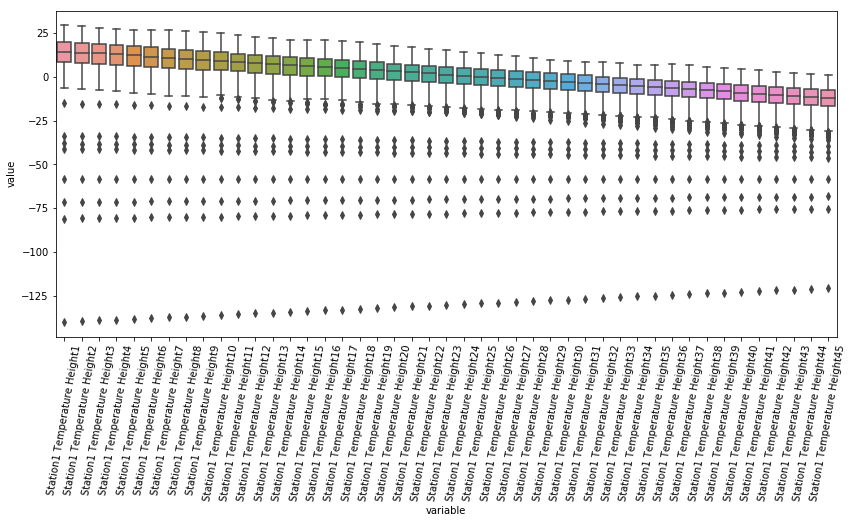

In [15]:
fig,ax = plt.subplots(figsize=(14,6))
g = sns.boxplot(x="variable", y="value", data=pd.melt(train_df[station1temp]))
g.set_xticklabels(g.get_xticklabels(), rotation=80)
plt.show()

As we can see in the boxplot of sensor measurement(temperature),there are outliers due to faulty sensors and needs to be removed before training the model,hence we calculate the z score and remove obsv with absolute values > 3 standard deviations.

from scipy import stats
import numpy as np
def remove_high_lev(df):
    for station in range(1,6):
        for col_type in (dew_point_cols,pressure_cols,temperature_cols,wind_direction_cols,wind_speed_cols):         
            station_no_col_type = [x for x in col_type if re.search(r".*Station"+str(station)+"\s+.*",x)]
            z = np.abs(stats.zscore(df[station_no_col_type]))                        
            df[station_no_col_type].drop(df[(z > 2).all(axis=1)].index,inplace=True)
    return df                           

In [16]:
from scipy import stats
import numpy as np
def remove_high_lev(col):

    #station_no_col_type = [x for x in col_type if re.search(r".*Station"+str(station)+"\s+.*",x)]
    #z = np.abs(stats.zscore(df[station_no_col_type]))    
    z = np.abs(stats.zscore(col)) 
    return [True if x>3 else False for x in z]
    #cdf = df[col_type].drop(df[(z > 3).all(axis=1)].index).copy()
    #cdf = df[station_no_col_type].drop(df[(z > 3).all(axis=1)].index).copy()
    #return cdf                           

In [17]:
outlier_mask = train_df[all_sensor_cols].apply(remove_high_lev)

In [18]:
outlier_mask.shape,train_df.shape

((2183, 1125), (2183, 1126))

In [19]:
train_df1 = train_df[~outlier_mask.any(axis=1)].copy()

In [20]:
train_df1.shape

(1670, 1126)

We have removed records with faulty sensor measurements and will verify the same with boxplots.

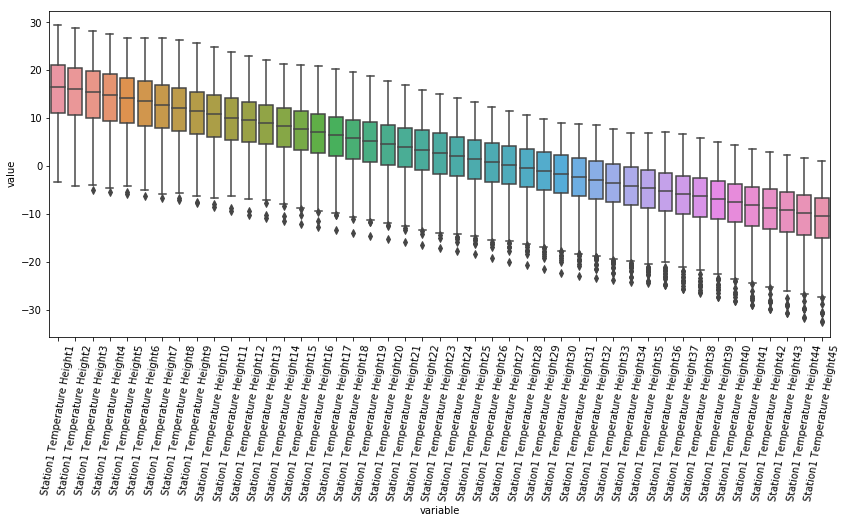

In [21]:
fig,ax = plt.subplots(figsize=(14,6))
g = sns.boxplot(x="variable", y="value", data=pd.melt(train_df1[station1temp]))
g.set_xticklabels(g.get_xticklabels(), rotation=80)
plt.show()

We will join pred dataframe with train data which includes flight details for 288 paragliding spots for several days. Flight details for each spot include max distance, total distance, number of flights that took place at that spot on a particular day. The conclustion is that if the total number of flights combining all these spots is more than or equal to 15 then it is good day else it is a bad day for paragliding. 

In [22]:
train_df_final = train_df1.merge(pred,on=['Day_Id'],how='left')
import re
total_flight_cols = [x for x in train_df_final.columns if re.search(r".*totalFlights",x)]
train_df_final['total_flights'] = train_df_final[total_flight_cols].sum(axis=1)

In [23]:
train_df_final['total_flights'].unique()

array([  0,   3,   2,   7,   6,  21,   1,  11,  14,   9,  29,   4,  49,
        13,  97,  53,  25,  10,  71,  74,  22, 156,  15,  16,   5,  32,
        12,  24,   8,  75,  40,  30,  19,  35,  34,  58,  18,  20,  17,
        81, 132, 102, 106,  96,  76, 111, 109,  57,  26,  91,  65,  62,
        23,  60,  37,  46,  36,  66, 105,  78,  31,  55,  72, 125,  33,
        93,  54,  27,  84,  63,  52,  28,  77, 137, 194, 110, 104, 164,
       190, 150, 161,  47,  95,  80,  90,  43, 120,  56, 243, 170,  68,
       128,  79, 158, 204,  82,  92, 142,  50,  73,  39, 126,  94, 141,
        98,  89, 145, 107, 114,  70,  61,  41, 187,  51,  99,  67,  45,
        88, 130, 100, 113, 307, 121, 222, 175, 249, 233, 172,  64,  42,
       103, 168,  59, 144, 119, 152, 116, 157, 266,  48, 198, 295, 306,
       245, 189, 140, 101,  69,  83,  44, 124, 117, 203, 394, 208, 176,
       305, 178, 200,  86, 173, 242,  38, 248, 244, 153, 148, 313, 235,
       134, 259, 177, 151, 146, 115,  85, 133, 182, 207, 171, 43

Text(0.5, 0.98, 'Histogram and boxplot of total_flights')

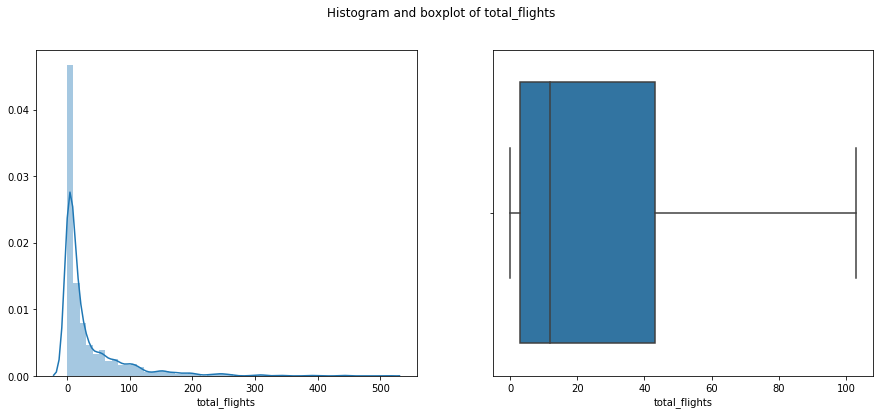

In [24]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,6))
sns.distplot(train_df_final['total_flights'],ax=ax[0])
sns.boxplot(train_df_final['total_flights'],ax=ax[1],showfliers=False)##we are not showing very large values as we are only interested whether total flights was greater than 15 or not
#sns.swarmplot(train_df_final['total_flights'], zorder=0,ax=ax[1],showfliers=False)
fig.suptitle('Histogram and boxplot of total_flights')


In [25]:
train_df_final['label'] = np.where(train_df_final['total_flights']>=15,1,0)

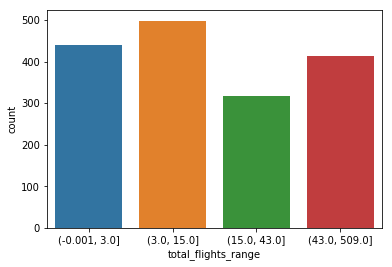

In [143]:
train_df_final['total_flights_bin'] = pd.qcut(train_df_final['total_flights'],q=[0, .25, .5, .75, 1.],labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q'])

train_df_final['total_flights_range'] = pd.qcut(train_df_final['total_flights'],q=[0, .25, .55, .75, 1.])

train_df_final['total_flights_range'] = train_df_final['total_flights_range'].astype('str')

sns.countplot(train_df_final['total_flights_range'])#.value_counts()

corr_matrix = train_df_final.corr()

#corr_matrix['total'].sort_values(ascending=False).filter(regex='.*Height1$', axis=0)

corr_matrix['total_flights'].sort_values(ascending=False).filter(regex='.*Height45$', axis=0)

In [29]:
train = train_df_final.copy()#[all_sensor_cols].copy()#.drop(columns=pred.columns,axis=1)
train_labels = train_df_final['label'].copy()
#train.drop(columns=['total_flights','label'],inplace=True)

test = test_df.copy()#[all_sensor_cols].copy()#.drop(columns=['Day_Id'],inplace=True)

In [30]:
train.shape,train_labels.shape,test.shape

((1670, 1994), (1670,), (100, 1126))

## Model Building & Validation

In [31]:
def random_grid_search_params(clf,random_grid,features):
    clf_random = RandomizedSearchCV(estimator = clf,scoring='roc_auc', param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    clf_random.fit(train_df_final[features], train_labels)
    print(">>Best_params<<\n",clf_random.best_params_)
    print(">>Best_score<<\n",clf_random.best_score_)
    return clf_random.best_estimator_

In [32]:
from sklearn.model_selection import StratifiedKFold
def stratify_kfold_cv(train_data,clf,features,weights=False):
    split = StratifiedKFold(n_splits=5,random_state=43,shuffle=True)
    i=1
    X_preds = np.zeros(train_data.shape[0])
    X_preds_label = np.zeros(train_data.shape[0])
    preds = np.zeros(test_df.shape[0])
    output_dict = dict()
    for train_index,test_index in split.split(train_data,train_data['total_flights_range']):
        #print("##########")
        #print(i,'fold>')
        dict_results = dict()
        X_train , X_val = train_data.iloc[train_index],train_data.iloc[test_index]
        y_train , y_val = train_labels.iloc[train_index],train_labels.iloc[test_index]
        X_train = X_train[features]
        X_val = X_val[features]
        if weights:
            sample_weights_data = train_df_final['weights'].copy()
            clf.fit(X_train,y_train,sample_weight=sample_weights_data)
        else:
            clf.fit(X_train,y_train)
        #print(clf.feature_importances_)


        X_preds[test_index] = clf.predict_proba(X_val)[:,1]
        X_preds_label[test_index] = clf.predict(X_val)
        #preds += clf.predict_proba(test_df)[:,1]
        y_predicted_val = clf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_predicted_val)
        dict_results['accuracy'] = accuracy_score(y_val, clf.predict(X_val))
        dict_results['precision'] = precision_score(y_val, clf.predict(X_val))
        dict_results['recall'] = recall_score(y_val, clf.predict(X_val))
        dict_results['f1score'] = f1_score(y_val, clf.predict(X_val))
        dict_results['roc_auc_score'] = auc
        tn, fp, fn, tp = confusion_matrix(y_val, clf.predict(X_val)).ravel()
        dict_results['TN'] = tn
        dict_results['FP'] = fp
        dict_results['FN'] = fn
        dict_results['TP'] = tp
        
        output_dict[str(i)+"Fold"] = dict_results
        print(str(i)+'fold completed')
        i+=1
    score = roc_auc_score(train_labels, X_preds)
    mean_accuracy = accuracy_score(train_labels, X_preds_label)
    mean_precision = precision_score(train_labels, X_preds_label)
    mean_recall = recall_score(train_labels, X_preds_label)
    mean_f1_score = f1_score(train_labels, X_preds_label)
    tn, fp, fn, tp = confusion_matrix(train_labels, X_preds_label).ravel()
    mean_dict = dict()
    mean_dict['TN'] = tn
    mean_dict['FP'] = fp
    mean_dict['FN'] = fn
    mean_dict['TP'] = tp
    mean_dict['accuracy'] = mean_accuracy
    mean_dict['precision'] = mean_precision
    mean_dict['recall'] = mean_recall
    mean_dict['f1score'] = mean_f1_score
    mean_dict['roc_auc_score'] = score
    output_dict['Overall'] = mean_dict
    #print(pd.DataFrame(output_dict))
    return (pd.DataFrame(output_dict))
    

#### Random forest w/ RandomizedsearchCV - Original features
We will start with the original features avaiable and fit randomforest model to our data and check the performance using cross-validation mechanism

In [33]:
random_state = np.random.RandomState(0)
rf_clf = RandomForestClassifier(random_state=random_state)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
# Create the random grid
rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [34]:
rf_final = random_grid_search_params(rf_clf,rf_param_grid,all_sensor_cols)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.5min finished


>>Best_params<<
 {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}
>>Best_score<<
 0.7365894697929011


In [35]:
rf_all_results=stratify_kfold_cv(train_df_final,rf_final,all_sensor_cols)##0.7666096465330601


1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [36]:
rf_all_results.T

FN     FP     TN     TP  accuracy   f1score  precision    recall  \
1Fold     55.0   35.0  147.0   98.0  0.731343  0.685315   0.736842  0.640523   
2Fold     54.0   54.0  133.0   94.0  0.677612  0.635135   0.635135  0.635135   
3Fold     56.0   44.0  138.0   97.0  0.701493  0.659864   0.687943  0.633987   
4Fold     53.0   51.0  131.0   98.0  0.687688  0.653333   0.657718  0.649007   
5Fold     61.0   44.0  137.0   90.0  0.683735  0.631579   0.671642  0.596026   
Overall  279.0  228.0  686.0  477.0  0.696407  0.652977   0.676596  0.630952   

         roc_auc_score  
1Fold         0.798966  
2Fold         0.733018  
3Fold         0.752819  
4Fold         0.752201  
5Fold         0.770590  
Overall       0.760795

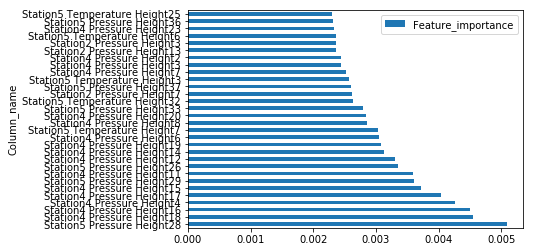

In [39]:
feat_imp = pd.DataFrame(rf_final.feature_importances_)
feat_imp.columns = ['Feature_importance']
feat_imp = feat_imp.assign(Column_name=all_sensor_cols)
feat_imp.sort_values(by=['Feature_importance'],ascending=False).set_index('Column_name').head(30).plot(kind='barh')

### Feature enginnering


We'll further try to bin measurements at similar heights as there wouldn't be much difference in sensor values.We could check this from boxplot of measurement values at heights closer to each other.

In [43]:
stns=['Station1','Station2','Station3','Station4','Station5']
def bin_measured_values(df,cols,coltype):
    for stn in stns:
        col = [x for x in cols if re.search(r""+str(stn),x)]
        for i in range(0,45,5):
            
            col_height_filter = [x for x in col if x.endswith(tuple(map(lambda x: 'Height'+str(x),range(i+1,i+6))))]
            #print(col_height_filter)
            #print("Height"+str(1+i)+"-"+str(5+i))
            df[stn+" "+coltype+" "+"Height"+str(1+i)+"-"+str(5+i)] = df[col_height_filter].mean(axis=1)
    #print('completed')
    
for i,j in zip(['dew','pressure','temp','wind_dir','wind_speed'],[dew_point_cols,pressure_cols,temperature_cols,wind_direction_cols,wind_speed_cols]):    
    bin_measured_values(train_df_final,j,i)
    bin_measured_values(test_df,j,i)
        #df[stn+" "+coltype+" "+"Height"+str(1+k)+"-"+str(5+k)] = df[col_height_filter].mean(axis=1)

In [44]:
def overall_measured_values(df,cols,coltype):
    for stn in stns:
        col = [x for x in cols if re.search(r""+str(stn),x)]
        df[stn+" "+coltype+" "+"Height1-45"] = df[col].mean(axis=1)
for i,j in zip(['dew','pressure','temp','wind_dir','wind_speed'],[dew_point_cols,pressure_cols,temperature_cols,wind_direction_cols,wind_speed_cols]):    
    overall_measured_values(train_df_final,j,i)
    overall_measured_values(test_df,j,i)
    

In [45]:
binning_features = [ x for x in train_df_final.columns if re.search(r"Height\d+-\d+",x)]

We'll take the weighted average of each sensor measurements at each station based on their absolute values of correlation with total flights such that each feature is weighted differently, and the resulting feature tends to
be more important in feature selection process while building each individual tree

In [46]:
for coltype in ['dew','temp','pressure','wind_dir','wind_speed']:
    test = train_df_final[['Station1 '+str(coltype)+' Height1-5','Station1 '+str(coltype)+' Height6-10','Station1 '+str(coltype)+' Height11-15',
                           'Station1 '+str(coltype)+' Height16-20','Station1 '+str(coltype)+' Height21-25','Station1 '+str(coltype)+' Height26-30',
                           'Station1 '+str(coltype)+' Height31-35','Station1 '+str(coltype)+' Height36-40','Station1 '+str(coltype)+' Height41-45',
                           'total_flights']].copy()
    print(test.corr()['total_flights'])

Station1 dew Height1-5      0.043565
Station1 dew Height6-10     0.042431
Station1 dew Height11-15    0.043253
Station1 dew Height16-20    0.016291
Station1 dew Height21-25    0.027981
Station1 dew Height26-30    0.008152
Station1 dew Height31-35   -0.001672
Station1 dew Height36-40   -0.006968
Station1 dew Height41-45   -0.027207
total_flights               1.000000
Name: total_flights, dtype: float64
Station1 temp Height1-5      0.193719
Station1 temp Height6-10     0.184025
Station1 temp Height11-15    0.172748
Station1 temp Height16-20    0.166064
Station1 temp Height21-25    0.147500
Station1 temp Height26-30    0.139564
Station1 temp Height31-35    0.133428
Station1 temp Height36-40    0.131844
Station1 temp Height41-45    0.136825
total_flights                1.000000
Name: total_flights, dtype: float64
Station1 pressure Height1-5      0.210847
Station1 pressure Height6-10     0.241342
Station1 pressure Height11-15    0.253858
Station1 pressure Height16-20    0.256485
Station1 p

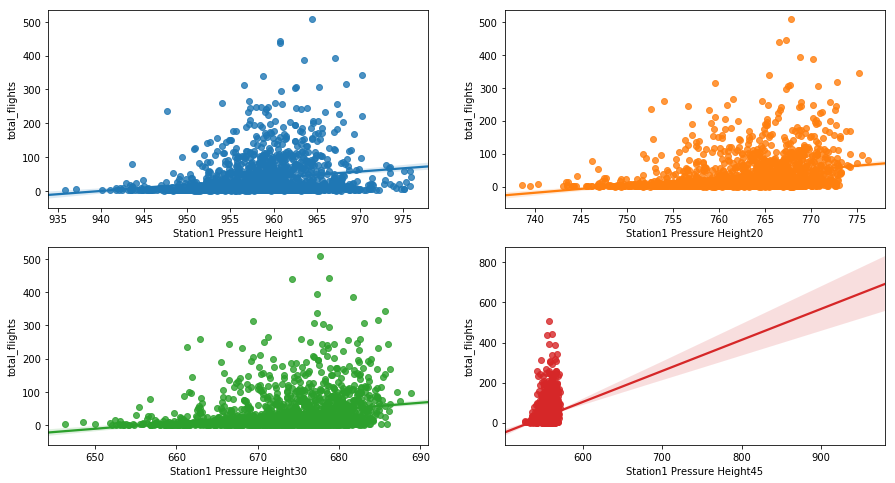

In [47]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
axs = axs.flatten()
sns.regplot(x='Station1 Pressure Height1', y='total_flights', data=train_df_final, ax=axs[0])
#axs[0].set(xlim=(500, 970))
sns.regplot(x='Station1 Pressure Height20', y='total_flights', data=train_df_final, ax=axs[1])
#axs[1].set(xlim=(500, 970))
sns.regplot(x='Station1 Pressure Height30', y='total_flights', data=train_df_final, ax=axs[2])
#axs[2].set(xlim=(500, 970))
sns.regplot(x='Station1 Pressure Height45', y='total_flights', data=train_df_final, ax=axs[3])
#axs[3].set(xlim=(500, 970))

plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler(feature_range=(0.01,1))
def calc_weights(stn_num,colstype):

    stn1temp = [x for x in colstype if re.search(r""+str(stn_num)+"\s+",x)]
    abs_corr  = abs(train_df_final[stn1temp+['total_flights']].corr()[['total_flights']][:-1])
    weights = sclr.fit_transform(abs_corr)
    #print(weights[0][0])
    wts = [weights[i][0] for i in range(0,45)]
    return wts

In [49]:
wts_dict = dict()


wts_dict['Station1'] = {}
wts_dict['Station2'] = {}
wts_dict['Station3'] = {}
wts_dict['Station4'] = {}
wts_dict['Station5'] = {}
for stn in ['Station1','Station2','Station3','Station4','Station5']:
    wts_dict[stn]['temp'] = calc_weights(stn,temperature_cols)
    wts_dict[stn]['dew'] = calc_weights(stn,dew_point_cols)
    wts_dict[stn]['pressure'] = calc_weights(stn,pressure_cols)
    wts_dict[stn]['wind_dir'] = calc_weights(stn,wind_direction_cols)
    wts_dict[stn]['wind_speed'] = calc_weights(stn,wind_speed_cols)


In [50]:

for stn in stns:
    for coltype,cols in zip(['dew','pressure','temp','wind_dir','wind_speed'],[dew_point_cols,pressure_cols,temperature_cols,wind_direction_cols,wind_speed_cols]):    
        col = [x for x in cols if re.search(r""+str(stn)+"\s+",x)]
        train_df_final[str(stn)+" "+str(coltype)+"-wtavg"] = train_df_final[col].apply(lambda x:np.average(x,weights=wts_dict[stn][coltype]),axis=1)
    

In [51]:
stns=['Station1','Station2','Station3','Station4','Station5']
for stn in stns:
    for coltype,cols in zip(['dew','pressure','temp','wind_dir','wind_speed'],[dew_point_cols,pressure_cols,temperature_cols,wind_direction_cols,wind_speed_cols]):    
        col = [x for x in cols if re.search(r""+str(stn)+"\s+",x)]
        test_df[str(stn)+" "+str(coltype)+"-wtavg"] = test_df[col].apply(lambda x:np.average(x,weights=wts_dict[stn][coltype]),axis=1)
    

In [52]:
weighted_avg_features = [x for x in train_df_final if re.search(r"wtavg",x)]

Create features such as max,min,variance,difference of each measurement types

In [53]:
stns=['Station1','Station2','Station3','Station4','Station5']
def new_feat(df,stns,cols_measures,coltype):
    for stn in stns:
        cols = [x for x in cols_measures if re.search(r"^"+stn,x)]
        #print(cols)
        df[stn+" "+coltype+" "+"max"] = df[cols].max(axis=1)
        df[stn+" "+coltype+" "+"min"] = df[cols].min(axis=1)
        df[stn+" "+coltype+" "+"mean"] = df[cols].mean(axis=1)
        df[stn+" "+coltype+" "+"std"] = df[cols].std(axis=1)
        df[stn+" "+coltype+" "+"var"] = df[cols].var(axis=1)
        df[stn+" "+coltype+" "+"max-min"] = df[stn+" "+coltype+" "+"max"] - df[stn+" "+coltype+" "+"min"]
        
        
for i,j in zip(['dew','pressure','temp','wind_dir','wind_speed'],[dew_point_cols,pressure_cols,temperature_cols,wind_direction_cols,wind_speed_cols]):                                              
    new_feat(train_df_final,stns,j,i)  
    new_feat(test_df,stns,j,i)


In [54]:
aggr_features = [x for x in train_df_final.columns if x.endswith(('max','min','max-min','mean','std','var'))]

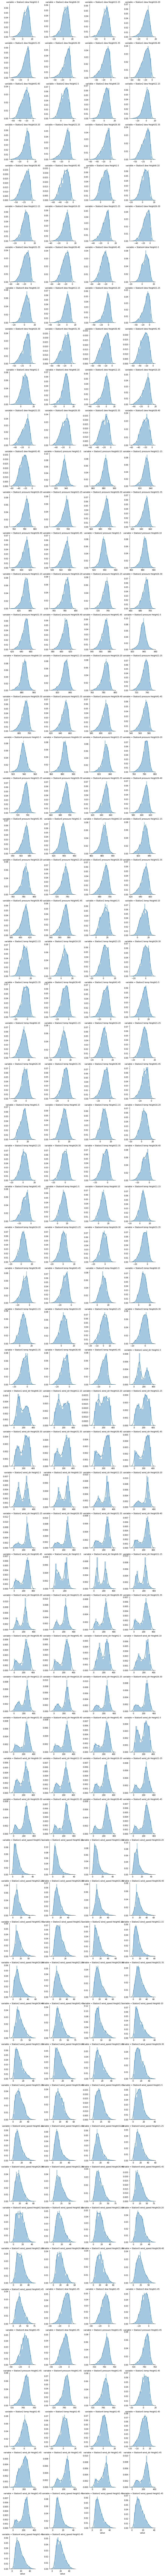

In [135]:
###hist plot of binned measurement features
#num = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
numdf=pd.melt(train_df_final,value_vars=new_feat_cols1)
numgrid=sns.FacetGrid(numdf,col='variable',col_wrap=4,sharex=False,sharey=False)
numgrid=numgrid.map(sns.distplot,'value')
numgrid.savefig("All-Station-grouped-measurements-hist-output.png")

In [152]:
#pd.melt(train_df_final, value_vars=new_feat_cols1,id_vars='total_flights_range')

In [150]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)
def gen_box_plot(station_no):
    cols = [x for x in new_feat_cols1 if re.search(r"Station"+str(station_no)+"\s",x)]
    p = pd.melt(train_df_final, value_vars=cols,id_vars='total_flights_range')
    g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
    g = g.map(boxplot, 'total_flights_range','value')
    g.savefig("Station-"+str(station_no)+"output.png")


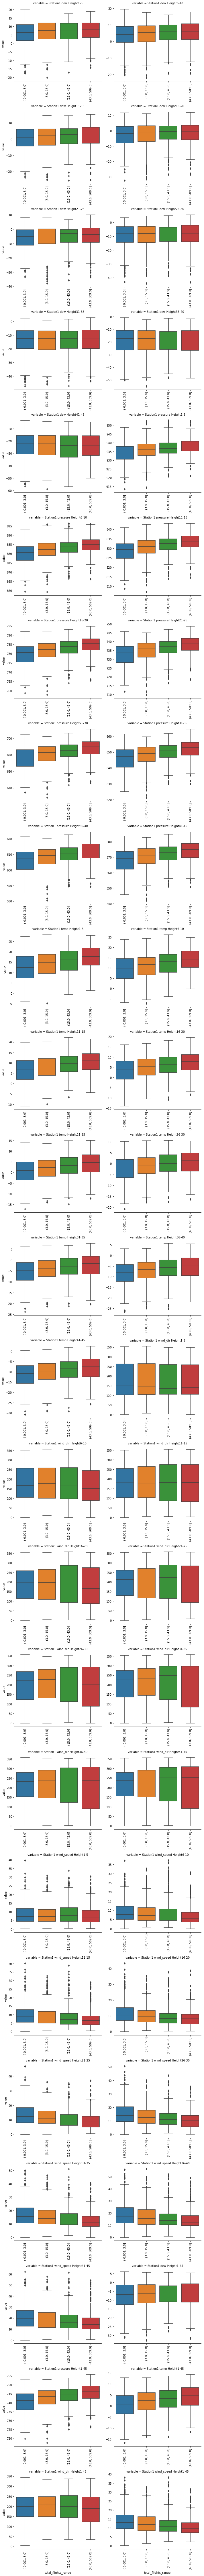

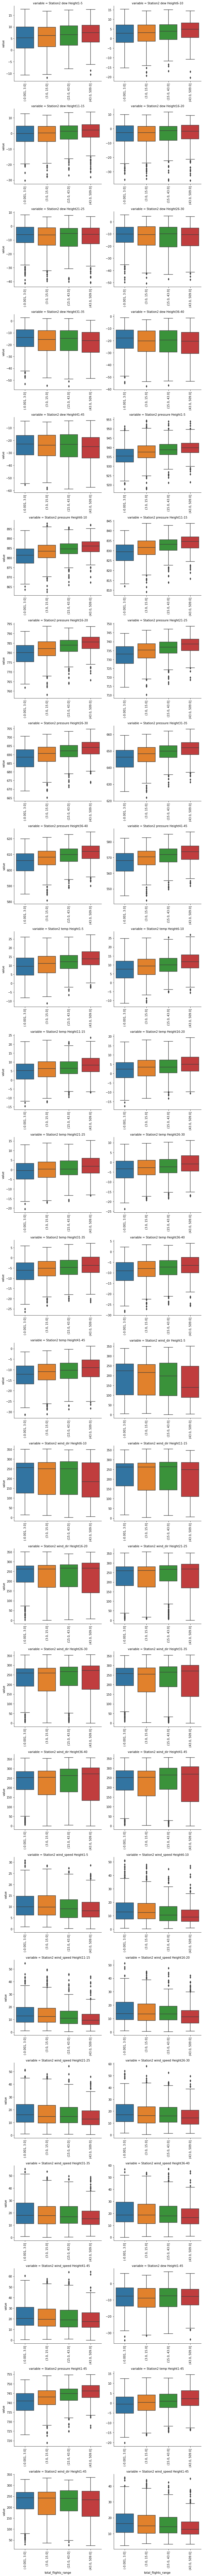

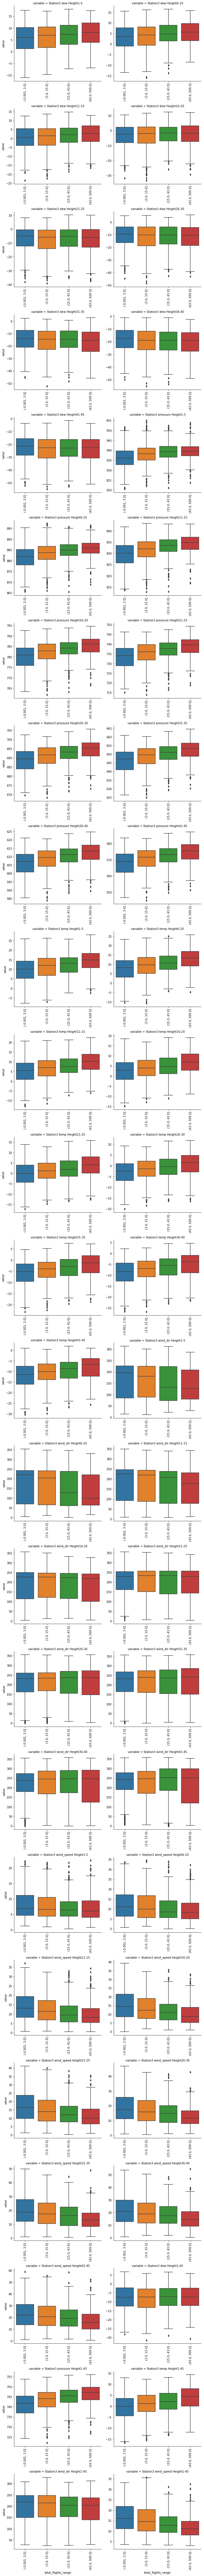

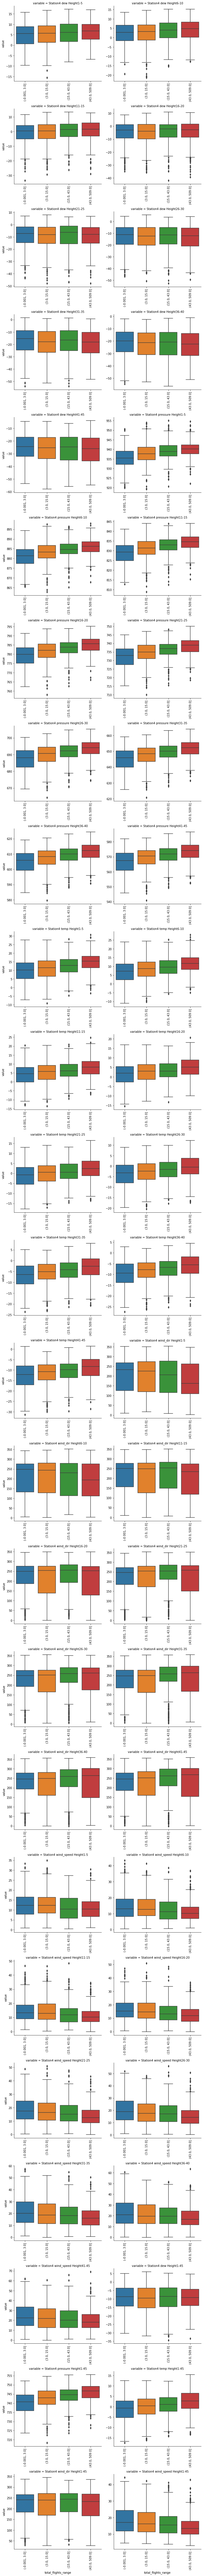

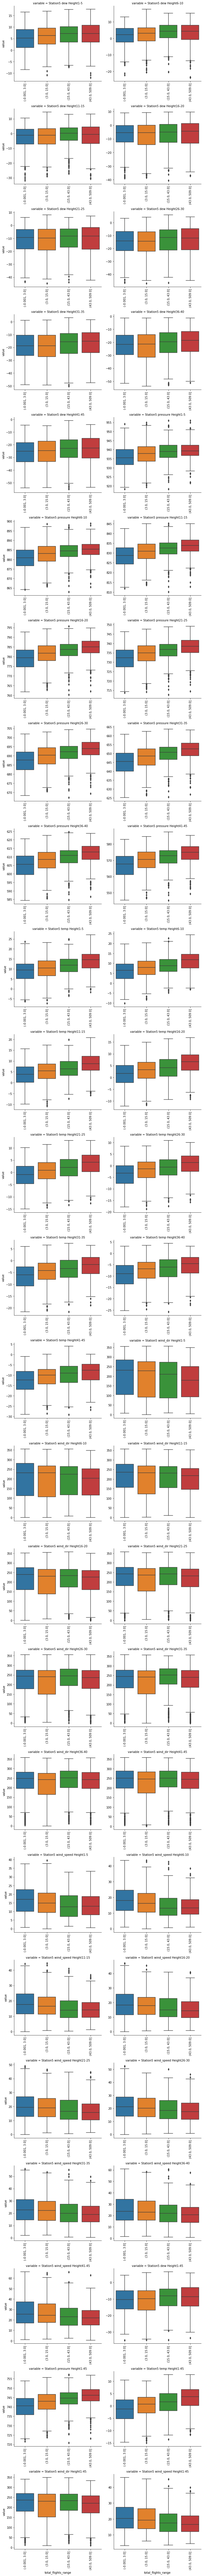

In [151]:
for stns in range(1,6):
    gen_box_plot(stns)

From the plots,windspeed,temperature and pressure seems to be correlated with the no of flights on a particular day

From the PCA analysis performed in another notebook we can try using pca features in our model,especially the pressure and temperature components since the first 3 pricipal components are explaining more than 90% variance in data,moreover pressure and temperature plays an importanat role in deciding of flights on a particular day. Refer PCA analysis notebook for further understanding on explained variance for each sensor measurements across stations.

In [55]:
scaler = StandardScaler()
pcadf = train_df_final[all_sensor_cols+['Day_Id']].copy()
pcadf[all_sensor_cols] = scaler.fit_transform(pcadf[all_sensor_cols])


In [56]:
pca = PCA(n_components=3)

pcadf['PC1'+'temp'] = pca.fit_transform(pcadf[temperature_cols].values)[:,0]
pcadf['PC2'+'temp'] = pca.fit_transform(pcadf[temperature_cols].values)[:,1]
pcadf['PC3'+'temp'] = pca.fit_transform(pcadf[temperature_cols].values)[:,2]

pcadf['PC1'+'pressure'] = pca.fit_transform(pcadf[pressure_cols].values)[:,0]
pcadf['PC2'+'pressure'] = pca.fit_transform(pcadf[pressure_cols].values)[:,1]
pcadf['PC3'+'pressure'] = pca.fit_transform(pcadf[pressure_cols].values)[:,2]

In [57]:
train_df_final = train_df_final.merge(pcadf[['PC1temp','PC2temp','PC3temp','PC1pressure','PC2pressure','PC3pressure','Day_Id']],on=['Day_Id'],how='left')

In [58]:
test_df['PC1'+'temp'] = pca.transform(test_df[temperature_cols].values)[:,0]
test_df['PC2'+'temp'] = pca.transform(test_df[temperature_cols].values)[:,1]
test_df['PC3'+'temp'] = pca.transform(test_df[temperature_cols].values)[:,2]

test_df['PC1'+'pressure'] = pca.transform(test_df[pressure_cols].values)[:,0]
test_df['PC2'+'pressure'] = pca.transform(test_df[pressure_cols].values)[:,1]
test_df['PC3'+'pressure'] = pca.transform(test_df[pressure_cols].values)[:,2]

In [60]:
pca_features = ['PC1temp','PC2temp','PC3temp','PC1pressure','PC2pressure','PC3pressure']

In [63]:
engineered_features = binning_features+weighted_avg_features+aggr_features+pca_features

### Random forest with new features

In [64]:
rf_new = random_grid_search_params(rf_clf,rf_param_grid,engineered_features)
rf_new_feat_results = stratify_kfold_cv(train_df_final,rf_new,engineered_features)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.0min finished


>>Best_params<<
 {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}
>>Best_score<<
 0.7385785041732961
1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [65]:
rf_new_feat_results.T

FN     FP     TN     TP  accuracy   f1score  precision    recall  \
1Fold     55.0   38.0  144.0   98.0  0.722388  0.678201   0.720588  0.640523   
2Fold     55.0   53.0  134.0   93.0  0.677612  0.632653   0.636986  0.628378   
3Fold     55.0   42.0  140.0   98.0  0.710448  0.668942   0.700000  0.640523   
4Fold     51.0   47.0  135.0  100.0  0.705706  0.671141   0.680272  0.662252   
5Fold     59.0   47.0  134.0   92.0  0.680723  0.634483   0.661871  0.609272   
Overall  275.0  227.0  687.0  481.0  0.699401  0.657104   0.679379  0.636243   

         roc_auc_score  
1Fold         0.800151  
2Fold         0.737751  
3Fold         0.754435  
4Fold         0.764719  
5Fold         0.770846  
Overall       0.765141

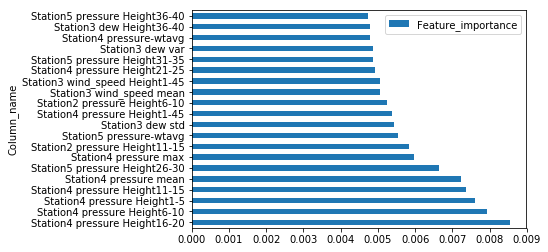

In [71]:
engg_feat_imp = pd.DataFrame(rf_new.feature_importances_)
engg_feat_imp.columns = ['Feature_importance']
engg_feat_imp = engg_feat_imp.assign(Column_name=engineered_features)
engg_feat_imp.sort_values(by=['Feature_importance'],ascending=False).set_index('Column_name').head(20).plot(kind='barh')

In [67]:
len(engineered_features),len(all_sensor_cols)

(431, 1125)

Slight improvement in performance with comparitively lesser number of features engineered from original features.We have reduced the 1125 dimesional features space to 431 dimensions through feature engineering and further improved the performance

## AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
adabst_clf = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.5,
                         random_state=0)
adabst_result = stratify_kfold_cv(train_df_final,adabst_clf,engineered_features)

1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [77]:
adabst_result.T

FN     FP     TN     TP  accuracy   f1score  precision    recall  \
1Fold     59.0   43.0  139.0   94.0  0.695522  0.648276   0.686131  0.614379   
2Fold     61.0   53.0  134.0   87.0  0.659701  0.604167   0.621429  0.587838   
3Fold     65.0   46.0  136.0   88.0  0.668657  0.613240   0.656716  0.575163   
4Fold     52.0   50.0  132.0   99.0  0.693694  0.660000   0.664430  0.655629   
5Fold     60.0   54.0  127.0   91.0  0.656627  0.614865   0.627586  0.602649   
Overall  297.0  246.0  668.0  459.0  0.674850  0.628337   0.651064  0.607143   

         roc_auc_score  
1Fold         0.769339  
2Fold         0.722250  
3Fold         0.729135  
4Fold         0.761553  
5Fold         0.725586  
Overall       0.741207

### Light GBM

In [75]:
lgbm_model = lgb.LGBMClassifier(lambda_l2=1.0,feature_fraction=0.6,num_boost_round=1200,num_leaves=9)
lgbm_new_feat_results = stratify_kfold_cv(train_df_final,lgbm_model,engineered_features)

1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [78]:
lgbm_new_feat_results.T

FN     FP     TN     TP  accuracy   f1score  precision    recall  \
1Fold     56.0   39.0  143.0   97.0  0.716418  0.671280   0.713235  0.633987   
2Fold     52.0   47.0  140.0   96.0  0.704478  0.659794   0.671329  0.648649   
3Fold     58.0   50.0  132.0   95.0  0.677612  0.637584   0.655172  0.620915   
4Fold     44.0   57.0  125.0  107.0  0.696697  0.679365   0.652439  0.708609   
5Fold     58.0   53.0  128.0   93.0  0.665663  0.626263   0.636986  0.615894   
Overall  268.0  246.0  668.0  488.0  0.692216  0.655034   0.664850  0.645503   

         roc_auc_score  
1Fold         0.795877  
2Fold         0.750470  
3Fold         0.754148  
4Fold         0.772142  
5Fold         0.759906  
Overall       0.766558

### XGBOOST w/ new features 

In [147]:
xgb_model = XGBClassifier()

In [148]:
#train_df_final['weights'] = np.where((train_df_final['total_flights_range']=='(3.0, 15.0]')|(train_df_final['total_flights_range']=='(15.0, 43.0]'),1,0.8)

In [149]:
xgb_new_feat_results_upd = stratify_kfold_cv(train_df_final,xgb_model,engineered_features)

1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [150]:
xgb_new_feat_results_upd.T

FN     FP     TN     TP  accuracy   f1score  precision    recall  \
1Fold     54.0   37.0  145.0   99.0  0.728358  0.685121   0.727941  0.647059   
2Fold     52.0   45.0  142.0   96.0  0.710448  0.664360   0.680851  0.648649   
3Fold     55.0   50.0  132.0   98.0  0.686567  0.651163   0.662162  0.640523   
4Fold     46.0   49.0  133.0  105.0  0.714715  0.688525   0.681818  0.695364   
5Fold     56.0   44.0  137.0   95.0  0.698795  0.655172   0.683453  0.629139   
Overall  263.0  225.0  689.0  493.0  0.707784  0.668928   0.686630  0.652116   

         roc_auc_score  
1Fold         0.795339  
2Fold         0.757552  
3Fold         0.754579  
4Fold         0.785787  
5Fold         0.762687  
Overall       0.770621

In [160]:
xgb_model.fit(train_df_final[engineered_features],train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [161]:
test_df['Good_Bad'] = xgb_model.predict(test_df[engineered_features])

In [162]:
test_df.shape

(100, 1558)

In [163]:
##Initial submission
sub = test_df[['Day_Id','Good_Bad']].copy()
sub=sub.reindex(columns=["Day_Id","Good_Bad"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

Very useful link to understand the hyperparameters and tune them.
https://sites.google.com/view/lauraepp/parameters

###### Hyper parameter tuning of xgboost

In [90]:
##randomized search
param_grid = {
    'max_depth' : [4, 8, 12],
    'learning_rate' : [0.01, 0.3, 0.5],
    'n_estimators' : [20, 50, 200],              
    'objective' : ["binary:logistic"],#['multi:softprob'],
    'gamma' : [0, 0.25, 0.5],
    'min_child_weight' : [1, 3, 5],
    'subsample' : [0.1, 0.5, 1],
    'colsample_bytree' : [0.1, 0.5, 1]}


xgb_random = RandomizedSearchCV(estimator = xgb_model,scoring='roc_auc', param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
xgb_random.fit(train_df_final[engineered_features], train_labels)
print(">>Best_params<<\n",xgb_random.best_params_)
print(">>Best_score<<\n",xgb_random.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.25, colsample_bytree=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.25, colsample_bytree=1, total=   1.0s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.25, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.25, colsample_bytree=1, total=   1.0s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.25, colsample_bytree=1 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.25, colsample_bytree=1, total=   1.0s
[CV] subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.5, colsample_bytree=0.5 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.5, colsample_bytree=0.5, total=   0.4s
[CV] subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.5, colsample_bytree=0.5 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_

[CV]  subsample=0.5, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.25, colsample_bytree=1, total=  10.3s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.25, colsample_bytree=1 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.25, colsample_bytree=1, total=  10.1s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.5, gamma=0, colsample_bytree=1 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.5, gamma=0, colsample_bytree=1, total=   0.9s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.5, gamma=0, colsample_bytree=1 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, mi

[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0, colsample_bytree=0.1, total=   0.2s
[CV] subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0, colsample_bytree=0.1, total=   0.2s
[CV] subsample=1, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.25, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.25, colsample_bytree=0.1, total=   0.3s
[CV] subsample=1, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.25, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=50, min_child_

[CV]  subsample=0.5, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.5, colsample_bytree=0.5, total=   1.6s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.5, colsample_bytree=0.5 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.5, colsample_bytree=0.5, total=   1.6s
[CV] subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=4, learning_rate=0.5, gamma=0.5, colsample_bytree=1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=4, learning_rate=0.5, gamma=0.5, colsample_bytree=1, total=   0.8s
[CV] subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=4, learning_rate=0.5, gamma=0.5, colsample_bytree=1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_

[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0, colsample_bytree=1, total=   1.1s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0, colsample_bytree=1 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0, colsample_bytree=1, total=   1.1s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   0.5s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=20, mi

[CV]  subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=8, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   4.1s
[CV] subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=8, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5 
[CV]  subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=8, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   4.0s
[CV] subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.25, colsample_bytree=0.1 
[CV]  subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.25, colsample_bytree=0.1, total=   0.1s
[CV] subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.25, colsample_bytree=0.1 
[CV]  subsample=0.1, objective=binary:logistic, n_estimato

[CV]  subsample=0.1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.25, colsample_bytree=1, total=   0.2s
[CV] subsample=0.1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.25, colsample_bytree=1 
[CV]  subsample=0.1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.25, colsample_bytree=1, total=   0.2s
[CV] subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=1 
[CV]  subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=1, total=   0.5s
[CV] subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=1 
[CV]  subsample=0.1, objective=binary:logistic, n_estimators=50, mi

[CV]  subsample=0.5, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.5, colsample_bytree=0.1, total=   0.4s
[CV] subsample=0.5, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.5, colsample_bytree=0.1 
[CV]  subsample=0.5, objective=binary:logistic, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.5, colsample_bytree=0.1, total=   0.4s
[CV] subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=8, learning_rate=0.3, gamma=0.5, colsample_bytree=0.5 
[CV]  subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=8, learning_rate=0.3, gamma=0.5, colsample_bytree=0.5, total=   0.3s
[CV] subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=8, learning_rate=0.3, gamma=0.5, colsample_bytree=0.5 
[CV]  subsample=0.1, objective=binary:logistic, n_estim

[CV]  subsample=0.1, objective=binary:logistic, n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.25, colsample_bytree=0.1, total=   0.1s
[CV] subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=0.1, total=   0.9s
[CV] subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=0.1, total=   0.9s
[CV] subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=200, min_child

[CV]  subsample=0.1, objective=binary:logistic, n_estimators=50, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.5, colsample_bytree=1, total=   0.5s
[CV] subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=1, total=   1.3s
[CV] subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=1, total=   1.3s
[CV] subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0, colsample_bytree=1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20, min_child_weight=5, max_depth

[CV]  subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.5, colsample_bytree=0.5, total=   4.3s
[CV] subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=8, learning_rate=0.3, gamma=0.25, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=8, learning_rate=0.3, gamma=0.25, colsample_bytree=0.1, total=   1.0s
[CV] subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=8, learning_rate=0.3, gamma=0.25, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=8, learning_rate=0.3, gamma=0.25, colsample_bytree=0.1, total=   1.0s
[CV] subsample=1, objective=binary:logistic, n_estimators=200, min_child_weight=3, max_depth=8, learning_rate=0.3, gamma=0.25, colsample_bytree=0.1 
[CV]  subsample=1, objective=binary:logistic, n_estimators=20

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  7.7min finished


>>Best_params<<
 {'subsample': 0.5, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.01, 'gamma': 0.25, 'colsample_bytree': 1}
>>Best_score<<
 0.7405819515699691


In [91]:
best_xgb_params = {'subsample': 0.5, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.01, 'gamma': 0.25, 'colsample_bytree': 1}
best_xgb_model = XGBClassifier(**best_xgb_params)

In [154]:
best_xgb_new_feat_results = stratify_kfold_cv(train_df_final,best_xgb_model,engineered_features)#,weights=True)

1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [155]:
best_xgb_new_feat_results.T

FN     FP     TN     TP  accuracy   f1score  precision    recall  \
1Fold     58.0   35.0  147.0   95.0  0.722388  0.671378   0.730769  0.620915   
2Fold     50.0   50.0  137.0   98.0  0.701493  0.662162   0.662162  0.662162   
3Fold     57.0   46.0  136.0   96.0  0.692537  0.650847   0.676056  0.627451   
4Fold     52.0   47.0  135.0   99.0  0.702703  0.666667   0.678082  0.655629   
5Fold     58.0   49.0  132.0   93.0  0.677711  0.634812   0.654930  0.615894   
Overall  275.0  227.0  687.0  481.0  0.699401  0.657104   0.679379  0.636243   

         roc_auc_score  
1Fold         0.802772  
2Fold         0.746242  
3Fold         0.756338  
4Fold         0.779419  
5Fold         0.775347  
Overall       0.771323

We'll provide higher weights to samples in range (3,15] as we would want a higher cost penalty for wrong predictions in this range and eventually increase our precision and decrease FP.

In [156]:
train_df_final['weights'] = np.where((train_df_final['total_flights_range']=='(3.0, 15.0]'),1,0.8)
#train_df_final['weights'] = np.where((train_df_final['total_flights_range']=='(15.0, 49.0]'),1,np.nan)
#train_df_final['weights'] = train_df_final['weights'].fillna(0.6)
#train_df_final['weights'] = np.where((train_df_final['total_flights_range']=='(3.0, 15.0]')|(train_df_final['total_flights_range']=='(15.0, 43.0]'),1,0.8)

In [157]:
best_xgb_new_feat_results1 = stratify_kfold_cv(train_df_final,best_xgb_model,engineered_features,weights=True)

1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [158]:
best_xgb_new_feat_results1.T

FN     FP     TN     TP  accuracy   f1score  precision    recall  \
1Fold     54.0   31.0  151.0   99.0  0.746269  0.699647   0.761538  0.647059   
2Fold     51.0   47.0  140.0   97.0  0.707463  0.664384   0.673611  0.655405   
3Fold     57.0   46.0  136.0   96.0  0.692537  0.650847   0.676056  0.627451   
4Fold     48.0   47.0  135.0  103.0  0.714715  0.684385   0.686667  0.682119   
5Fold     58.0   48.0  133.0   93.0  0.680723  0.636986   0.659574  0.615894   
Overall  268.0  219.0  695.0  488.0  0.708383  0.667122   0.690240  0.645503   

         roc_auc_score  
1Fold         0.802844  
2Fold         0.742954  
3Fold         0.755046  
4Fold         0.778510  
5Fold         0.779408  
Overall       0.770798

In [166]:
best_xgb_model.fit(train_df_final[engineered_features],train_labels,sample_weight=train_df_final['weights'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.25, learning_rate=0.01,
       max_delta_step=0, max_depth=12, min_child_weight=3, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)

In [167]:
test_df['Good_Bad'] = best_xgb_model.predict(test_df[engineered_features])
##Second submission
sub = test_df[['Day_Id','Good_Bad']].copy()
sub=sub.reindex(columns=["Day_Id","Good_Bad"])
filename = 'submission.csv'
sub.to_csv(filename, index=False)

##################################################################

Due to computational limitation and time constraints we'll perfor hyper parameter tuning with Bayesian optimization instead of a comprehensive grid search of parameters

In [159]:
from skopt import BayesSearchCV
from sklearn.metrics import make_scorer
ITERATIONS = 25 # 1000
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = make_scorer(f1_score),
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [87]:
xgb_new_result = bayes_cv_tuner.fit(train_df_final[engineered_features].values, train_labels.values, callback=status_print)

Model #1
Best ROC-AUC: 0.5
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.13031389926541354, 'learning_rate': 0.042815319280763466, 'max_delta_step': 13, 'max_depth': 21, 'min_child_weight': 2, 'n_estimators': 87, 'reg_alpha': 5.497557739289786e-07, 'reg_lambda': 0.05936070635912049, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216}

Model #2
Best ROC-AUC: 0.6225
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, 'learning_rate': 0.7988179462781242, 'max_delta_step': 17, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.0005266983003701547, 'reg_lambda': 276.5424475574225, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134}

Model #3
Best ROC-AUC: 0.6762
Best params: {'colsample_bylevel': 0.4503841871781403, 'colsample_bytree': 0.9195352964526833, 'gamma': 8.168958221061441e-09, 'lea

Model #21
Best ROC-AUC: 0.6794
Best params: {'colsample_bylevel': 0.955923206446829, 'colsample_bytree': 0.7036152301751524, 'gamma': 0.03823613443879595, 'learning_rate': 0.06786442521779147, 'max_delta_step': 8, 'max_depth': 11, 'min_child_weight': 0, 'n_estimators': 69, 'reg_alpha': 0.00022356829889037284, 'reg_lambda': 1.2908532337409298e-07, 'scale_pos_weight': 4.73588486119117, 'subsample': 0.4499578015509351}

Model #22
Best ROC-AUC: 0.6794
Best params: {'colsample_bylevel': 0.955923206446829, 'colsample_bytree': 0.7036152301751524, 'gamma': 0.03823613443879595, 'learning_rate': 0.06786442521779147, 'max_delta_step': 8, 'max_depth': 11, 'min_child_weight': 0, 'n_estimators': 69, 'reg_alpha': 0.00022356829889037284, 'reg_lambda': 1.2908532337409298e-07, 'scale_pos_weight': 4.73588486119117, 'subsample': 0.4499578015509351}

Model #23
Best ROC-AUC: 0.6875
Best params: {'colsample_bylevel': 0.7307968509811582, 'colsample_bytree': 0.5179152536187541, 'gamma': 0.0018406853480943382, 

In [128]:
Best_params = {'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'gamma': 2.92304761271297e-05, 'learning_rate': 0.23405813513519594, 'max_delta_step': 9, 'max_depth': 50, 'min_child_weight': 1, 'n_estimators': 70, 'reg_alpha': 1.0, 'reg_lambda': 1e-09, 'scale_pos_weight': 1.7055606501171967, 'subsample': 0.7217811456576027}



In [129]:
upd_xgb_model = XGBClassifier(**Best_params)##(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,


In [137]:
upd_xgb_results = stratify_kfold_cv(train_df_final,upd_xgb_model,all_sensor_cols+new_feat_cols+new_feat_cols2+new_feat_cols1,weights=True)

1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [138]:
upd_xgb_results

1Fold       2Fold       3Fold       4Fold       5Fold  \
FN              45.000000   51.000000   47.000000   40.000000   43.000000   
FP              44.000000   54.000000   51.000000   56.000000   57.000000   
TN             138.000000  133.000000  131.000000  126.000000  124.000000   
TP             108.000000   97.000000  106.000000  111.000000  108.000000   
accuracy         0.734328    0.686567    0.707463    0.711712    0.698795   
f1score          0.708197    0.648829    0.683871    0.698113    0.683544   
precision        0.710526    0.642384    0.675159    0.664671    0.654545   
recall           0.705882    0.655405    0.692810    0.735099    0.715232   
roc_auc_score    0.792430    0.754119    0.744308    0.766429    0.766273   

                  Overall  
FN             226.000000  
FP             262.000000  
TN             652.000000  
TP             530.000000  
accuracy         0.707784  
f1score          0.684755  
precision        0.669192  
recall           0.701058  
roc_auc_score    0.764469

In [ ]:
search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    }

def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

In [132]:
upd_xgb_results

1Fold       2Fold       3Fold       4Fold       5Fold  \
FN              45.000000   52.000000   48.000000   44.000000   43.000000   
FP              49.000000   53.000000   53.000000   59.000000   58.000000   
TN             133.000000  134.000000  129.000000  123.000000  123.000000   
TP             108.000000   96.000000  105.000000  107.000000  108.000000   
accuracy         0.719403    0.686567    0.698507    0.690691    0.695783   
f1score          0.696774    0.646465    0.675241    0.675079    0.681388   
precision        0.687898    0.644295    0.664557    0.644578    0.650602   
recall           0.705882    0.648649    0.686275    0.708609    0.715232   
roc_auc_score    0.802306    0.730055    0.753178    0.757914    0.775383   

                  Overall  
FN             232.000000  
FP             272.000000  
TN             642.000000  
TP             524.000000  
accuracy         0.698204  
f1score          0.675258  
precision        0.658291  
recall           0.693122  
roc_auc_score    0.763625

In [124]:
upd_xgb_results

1Fold       2Fold       3Fold       4Fold       5Fold  \
FN             153.000000  148.000000  153.000000  147.000000  148.000000   
FP               0.000000    0.000000    0.000000    0.000000    0.000000   
TN             182.000000  187.000000  182.000000  182.000000  181.000000   
TP               0.000000    0.000000    0.000000    4.000000    3.000000   
accuracy         0.543284    0.558209    0.543284    0.558559    0.554217   
f1score          0.000000    0.000000    0.000000    0.051613    0.038961   
precision        0.000000    0.000000    0.000000    1.000000    1.000000   
recall           0.000000    0.000000    0.000000    0.026490    0.019868   
roc_auc_score    0.794656    0.750397    0.756482    0.758824    0.776225   

                  Overall  
FN             749.000000  
FP               0.000000  
TN             914.000000  
TP               7.000000  
accuracy         0.551497  
f1score          0.018349  
precision        1.000000  
recall           0.009259  
roc_auc_score    0.767233

In [113]:
upd_xgb_results

1Fold       2Fold       3Fold       4Fold       5Fold  \
FN             145.000000  147.000000  151.000000  145.000000  142.000000   
FP               0.000000    1.000000    0.000000    0.000000    3.000000   
TN             182.000000  186.000000  182.000000  182.000000  178.000000   
TP               8.000000    1.000000    2.000000    6.000000    9.000000   
accuracy         0.567164    0.558209    0.549254    0.564565    0.563253   
f1score          0.099379    0.013333    0.025806    0.076433    0.110429   
precision        1.000000    0.500000    1.000000    1.000000    0.750000   
recall           0.052288    0.006757    0.013072    0.039735    0.059603   
roc_auc_score    0.806795    0.755998    0.763305    0.754712    0.781311   

                  Overall  
FN             730.000000  
FP               4.000000  
TN             910.000000  
TP              26.000000  
accuracy         0.560479  
f1score          0.066158  
precision        0.866667  
recall           0.034392  
roc_auc_score    0.772210

For example if our data has 90% negative samples and 10% positive samples which is very imbalanced.
we'd try to use the parameter of scale_pos_weight and set it as 9.

It doesn't modify your data but change the weights of the positive obeservations.
The approache is called cost sensitive, the idea is to force the model to take care of the rare event by increasing the loss if it fails to correctly predict them.
It works much better than subsampling and co.

In [289]:
#Model #20
#Best ROC-AUC: 0.7781
Best_params=  {'colsample_bylevel': 0.8659659275316633, 'colsample_bytree': 0.5502981882831188, 'gamma': 0.020737446920009037, 'learning_rate': 0.1416947638649497, 'max_delta_step': 19, 'max_depth': 38, 'min_child_weight': 3, 'n_estimators': 82, 'reg_alpha': 1.1629841239477682e-07, 'reg_lambda': 0.016531443607570532, 'scale_pos_weight': 0.059869588007783255, 'subsample': 1.0}


In [300]:
best_xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8659659275316633,
       colsample_bytree=0.5502981882831188, gamma=0.020737446920009037, learning_rate=0.1416947638649497, max_delta_step=19,
       max_depth=38, min_child_weight=3, missing=None, n_estimators=82,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1.1629841239477682e-07, reg_lambda=0.016531443607570532, scale_pos_weight=0.059869588007783255, seed=None,
       silent=True, subsample=1.0
                              )

In [336]:
np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [337]:
from sklearn.metrics import make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(f1_score)}
xgb_test = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8659659275316633,
       colsample_bytree=0.5502981882831188, gamma=0.020737446920009037, learning_rate=0.1416947638649497, max_delta_step=19,
       max_depth=38, min_child_weight=3, missing=None, n_estimators=82,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1.1629841239477682e-07, reg_lambda=0.016531443607570532, seed=None,
       silent=True, subsample=1.0)
grid_xgb = {'scale_pos_weight':np.linspace(0,1,20)}
clf_random = GridSearchCV(estimator = xgb_test,scoring=scoring, param_grid = grid_xgb,  cv = 3, refit='AUC', return_train_score=True)
# Fit the random search model
clf_random.fit(train_df_final[all_sensor_cols+new_feat_cols+new_feat_cols1], train_labels)
print(">>Best_params<<\n",clf_random.best_params_)
print(">>Best_score<<\n",clf_random.best_score_)
#clf_random.best_estimator_

>>Best_params<<
 {'scale_pos_weight': 0.10526315789473684}
>>Best_score<<
 0.7328617527671146


In [330]:
final_best_xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8659659275316633,
       colsample_bytree=0.5502981882831188, gamma=0.020737446920009037, learning_rate=0.1416947638649497, max_delta_step=19,
       max_depth=38, min_child_weight=3, missing=None, n_estimators=82,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1.1629841239477682e-07, reg_lambda=0.016531443607570532, scale_pos_weight=0.04040404040404041, seed=None,
       silent=True, subsample=1.0
                              )

In [331]:
final_xgb_best_results = stratify_kfold_cv(train_df_final,final_best_xgb_model,new_feat_cols1+new_feat_cols+all_sensor_cols)

1fold completed
2fold completed
3fold completed
4fold completed
5fold completed


In [332]:
final_xgb_best_results

1Fold       2Fold       3Fold       4Fold       5Fold  \
FN             133.000000  137.000000  136.000000  132.000000  122.000000   
FP               1.000000    4.000000    4.000000    1.000000    6.000000   
TN             181.000000  183.000000  178.000000  181.000000  175.000000   
TP              20.000000   11.000000   17.000000   19.000000   29.000000   
accuracy         0.600000    0.579104    0.582090    0.600601    0.614458   
f1score          0.229885    0.134969    0.195402    0.222222    0.311828   
precision        0.952381    0.733333    0.809524    0.950000    0.828571   
recall           0.130719    0.074324    0.111111    0.125828    0.192053   
roc_auc_score    0.807405    0.763152    0.771170    0.753002    0.778932   

                  Overall  
FN             660.000000  
FP              16.000000  
TN             898.000000  
TP              96.000000  
accuracy         0.595210  
f1score          0.221198  
precision        0.857143  
recall           0.126984  
roc_auc_score    0.774892

0.708771838421729
0.41000000000000003


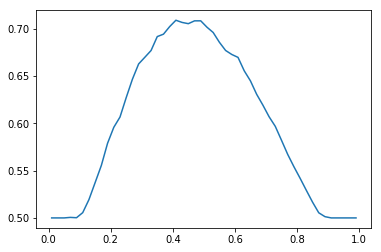

In [179]:
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([roc_auc_score(train_labels, xpred>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())
print(best_threshold)

In [175]:
results

1Fold     2Fold   Overall
accuracy       0.712575  0.706587  0.709581
f1score        0.712575  0.706587  0.667124
precision      0.712575  0.706587  0.693295
recall         0.712575  0.706587  0.642857
roc_auc_score  0.712575  0.706587  0.770196